# Данные: Рост и вес людей
# Предобработка данных: StandardScaler
# Модели: SGDRegressor,LinearRegression

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDClassifier,SGDRegressor,LogisticRegression
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import seaborn as sns

In [78]:
data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/weights_heights.csv')
data

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [79]:
data.drop('Index',axis=1,inplace=True)
data

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


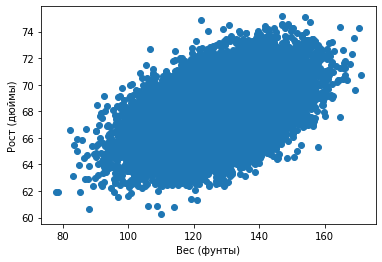

In [80]:
plt.scatter(data.Weight,data.Height);
plt.xlabel('Вес (фунты)');
plt.ylabel('Рост (дюймы)');

In [81]:
X , y = data.Weight.values , data.Height.values
X , y

(array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.874 ]),
 array([65.78331, 71.51521, 69.39874, ..., 64.69855, 67.52918, 68.87761]))

In [82]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y,test_size=0.3,random_state=17)
X_train.shape , X_valid.shape , y_train.shape , y_valid.shape

((17500,), (7500,), (17500,), (7500,))

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0],1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0],1]))

In [84]:
%%time
sgd_reg = SGDRegressor(random_state=17).fit(X_train_scaled,y_train)
mean_squared_error(y_valid,sgd_reg.predict(X_valid_scaled)) , sgd_reg.intercept_[0] , sgd_reg.coef_[0]

Wall time: 9 ms


(2.671087804186907, 67.99674735435669, 0.9413990213117056)

In [85]:
%%time
lin_reg = LinearRegression().fit(X_train_scaled,y_train)
mean_squared_error(y_valid,lin_reg.predict(X_valid_scaled))

Wall time: 0 ns


2.6708307676676344

# Данные: UCI по раку молочной железы
# Предобработка данных: StandardScaler
# Модели: LogisticRegression,SGDClassifier

In [86]:
from sklearn.datasets import load_breast_cancer

In [87]:
cancer = load_breast_cancer()
X , y = cancer.data , [-1 if i==0 else 1 for i in cancer.target]

In [88]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y,test_size=0.3,random_state=17)
len(X_train) , len(X_valid) , len(y_train) , len(y_valid)

(398, 171, 398, 171)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [90]:
%%time
sgd_clf = SGDClassifier(random_state=17,n_jobs=-1,n_iter_no_change=3,eta0=10**-3,alpha=1).fit(X_train_scaled,y_train)
log_loss(y_valid,sgd_clf.predict(X_valid_scaled)) , mean_squared_error(y_valid,sgd_clf.predict(X_valid_scaled))

Wall time: 3 ms


(1.8178724206495205, 0.21052631578947367)

In [91]:
%%time
log_reg = LogisticRegression(random_state=17).fit(X_train_scaled,y_train)
mean_squared_error(y_valid,log_reg.predict(X_valid_scaled)) , roc_auc_score(y_valid,log_reg.predict(X_valid_scaled)) \
,log_loss(y_valid,log_reg.predict(X_valid_scaled))

Wall time: 9.01 ms


(0.0935672514619883, 0.9672131147540984, 0.8079432980664542)

# Данные: отзывы к фильмам
# Предобработка данных: CountVectorizer
# Модели: LogisticRegression,SGDClassifier

In [92]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
%%time
reviews_train = load_files('train')
reviews_test = load_files('test')
text_train , y_train = reviews_train.data , reviews_train.target
text_test , y_test = reviews_test.data , reviews_test.target

Wall time: 5.15 s


In [94]:
%%time
cv = CountVectorizer(ngram_range=(1,2))
X_train = cv.fit_transform(text_train)
X_test = cv.transform(text_test)

Wall time: 23.2 s


In [95]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((25000, 1513832), (25000, 1513832), (25000,), (25000,))

In [96]:
%%time
log_reg = LogisticRegression(random_state=17,n_jobs=-1).fit(X_train,y_train)
roc_auc_score(y_test,log_reg.predict(X_test)) 

Wall time: 28.9 s


0.8964

In [97]:
%%time 
sgd_clf = SGDClassifier(max_iter=100,random_state=17,n_jobs=-1).fit(X_train,y_train)
roc_auc_score(y_test,sgd_clf.predict(X_test))


Wall time: 1.29 s


0.88852